The aim of this notebook is twofold: 
- introduce or recall Mixed Integer Linear Programming and 
- introduce the project of the module, inspired from a problem you already seen : Energy MultiAnnual Planning in "La Réunion" island.

First steps will help you reconnect with Mixed Integer Linear Programming (MILP) and associated tool *pulp* as an optimisation technique and tool.  

<!-- To begin with, an equivalent to the Excel Sheet you manipulated will be implemented. The project will then be to extend the problem, several options are welcome :
- make the problem definition more realistic,
- move on to devising the best energy production items,
- ...
 -->
 
Please, keep in mind that MILP is not the only technique you should be aware of. Depending on your choices, MILP may not be the best option to implement your version of the problem. Constraint Programming or metaheuristics may be best suited to it. Other notebooks are provided to help you discover or rediscover those techniques and associated tools. Be sure to make a good, arguable choice to implement your version of the problem. 

> During this session, we will use *IPython Notebook*. The current webpage embeds a Python interpreter. Each cell may be either text (Markdown) or code (Python) to be executed. All cells may be edited (double-click) and transformed (`Maj+Enter`) into text or passed to the interpreter. The result given by the interpreter and possible graphical representations appear below.

Note that:
- the current file is automatically saved as you work;
- you may add cells with the `+` icon and choose their type (code or Markdown) in the corresponding drop menu.
- some code cells contain a solution proposition, use them only after trying by yourself



# Linear (and Mixed-Integer Linear) Programming introduction

We will use and import the `pulp` library. `pulp` gives access to a mixed-integer linear programming API that we will use. A free open-source solver named `coin` is embedded within the package, but it is also possible to bind commercial solvers like CPLEX or GUROBI. Ask your instructor if need be.

Click on the cell and `Ctrl+Enter` to execute the Python command.

The following cell contains some imports that are needed to prepare the environment (please note it needs to be reexecuted if the kernel is restarted, before being able to run further cells)

In [1]:
# PuLP is the MILP tool we use here 
import pulp

# Regular imports for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# numpy always helps!
import numpy as np

## Linear Programming

# Etude de cas optimisation sous contraintes

## Power range

In [7]:
import pandas as pd

In [8]:
from pandas import DataFrame

In [67]:
centralesSUD = ['bagasse1', 'bagasse2', 'bagasse3', 'hydro', 'solaire', 'bio', 'eolien', 'importNord']


# euros / MWh - coûts marginaux
costSUD = 3*[40] + 4*[0] + [0]

# euros / MWh - coûts de démarrage
costSUD_startup = 3*[50000] + 4*[0] + [0] 
 

dataSUD = pd.DataFrame([[10, 10, 10, 0, 0, 0, 0, -100], [33, 33, 33, 134, 115, 4, 16, 100], [6, 6, 6, 0, 0, 0, 0, 0], costSUD, costSUD_startup], 
                       columns = centralesSUD, index = ['Pmin', 'Pmax', 'durationMIN', 'costMarginal', 'costStartUp'])
print(dataSUD)

minNORD = 3*[10] + 2*[15] + 12*[0] + [0] + [-100]
maxNORD = 3*[37] + 2*[40] + 12*[18] + [58] + [100]

durationMIN_NORD = 3*[6] + 2*[1] + 12*[1] + [0] + [0]

# euros / MWh - coûts marginaux
costNORD = 3*[40] + 2*[150] + 12*[80] + [0] + [0]

# euros / MWh - coûts démarrage
costNORD_startup = 3*[40] + 2*[2000] + 12*[1000] + [0] + [0]

centralesNORD = ['bagasse1', 'bagasse2', 'bagasse3', 'TAC1', 'TAC2', 'diesel1', 'diesel2', 'diesel3', 'diesel4', 'diesel5', 
                 'diesel6', 'diesel7', 'diesel8', 'diesel9', 'diesel10', 'diesel11', 'diesel12', 'solaire', 'importSud']

dataNORD = pd.DataFrame([minNORD, maxNORD, durationMIN_NORD, costNORD, costNORD_startup], 
                        columns = centralesNORD, index = ['Pmin', 'Pmax', 'durationMIN', 'costMarginal', 'costStartUp'])
print(dataNORD)

              bagasse1  bagasse2  bagasse3  hydro  solaire  bio  eolien  \
Pmin                10        10        10      0        0    0       0   
Pmax                33        33        33    134      115    4      16   
durationMIN          6         6         6      0        0    0       0   
costMarginal        40        40        40      0        0    0       0   
costStartUp      50000     50000     50000      0        0    0       0   

              importNord  
Pmin                -100  
Pmax                 100  
durationMIN            0  
costMarginal           0  
costStartUp            0  
              bagasse1  bagasse2  bagasse3  TAC1  TAC2  diesel1  diesel2  \
Pmin                10        10        10    15    15        0        0   
Pmax                37        37        37    40    40       18       18   
durationMIN          6         6         6     1     1        1        1   
costMarginal        40        40        40   150   150       80       80   
costSta

## Costs

In [38]:
cost1_1 = 15
cost1_2 = 45
cost1_3 = 50
cost1_4 = 10
cost1_5 = 50

cost2_1 = 15
cost2_2 = 45
cost2_3 = 50
cost2_4 = 12

## Durée marche arrêt

## Capacity total

In [39]:
cap1_1 = 100
cap1_2 = 134
cap1_3 = 115
cap1_4 = 4
cap1_5 = 16

cap2_1 = 111
cap2_2 = 80
cap2_3 = 216
cap2_4 = 58

## Demand

20
108.90945
20
133.11155


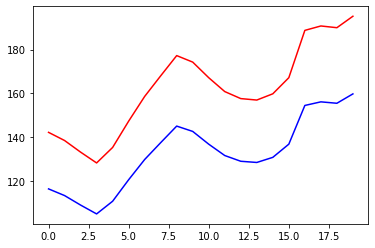

In [39]:
# demand expressed hour by hour
demand_Nord = [116.3034, 113.25285, 108.90945, 104.8626, 110.655, 120.4857, 129.7341, 137.4372, 145.0116,
142.57845, 136.7397, 131.5557, 128.9304, 128.38455, 130.7223, 136.7514, 154.4481, 156.0933, 155.4471, 159.732] # change the values so they are relevant to yours

print(len(demand_Nord))
print(demand_Nord[2])

demand_Sud = [142.1486, 138.42015, 133.11155, 128.1654, 135.245, 147.2603, 158.5639, 167.9788, 177.2364, 174.26255, 167.1263,
160.7903, 157.5816, 156.91445, 159.7717, 167.1406, 188.7699, 190.7807, 189.9909, 195.228] # change the values so they are relevant to yours

print(len(demand_Sud))
print(demand_Sud[2])

# a simple graphical visualisation of the demand
plt.plot(demand_Nord,'b', demand_Sud, 'r')

## Variables

In [52]:
xSUD = 7*[20*[0]]
xSUD

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [68]:
# x1_i - sud
# x2_j - nord

xSUD = 8*[20*[0]]  # 7 moyens de prod et 20 heures dans la journée choisie

for k in range(8):
    xSUD[k] = [pulp.LpVariable("xSUD_" + dataSUD.columns[k] + "_" + f"{i + 1}", dataSUD[dataSUD.columns[k]]['Pmin'], dataSUD[dataSUD.columns[k]]['Pmax']) for i in range(0, len(demand_Sud))]

print(xSUD[3])  # hydro1 pour 20 heures pour SUD

xNORD = 19*[20*[0]]  # 18 moyens de prod et 20 heures dans la journée choisie

for k in range(19):
    xNORD[k] = [pulp.LpVariable("xNORD_" + dataNORD.columns[k] + "_" + f"{i + 1}", dataNORD[dataNORD.columns[k]]['Pmin'], dataNORD[dataNORD.columns[k]]['Pmax']) for i in range(0, len(demand_Sud))]

print(xNORD[4])  # TAC2 pour 20 heures pour NORD

[xSUD_hydro_1, xSUD_hydro_2, xSUD_hydro_3, xSUD_hydro_4, xSUD_hydro_5, xSUD_hydro_6, xSUD_hydro_7, xSUD_hydro_8, xSUD_hydro_9, xSUD_hydro_10, xSUD_hydro_11, xSUD_hydro_12, xSUD_hydro_13, xSUD_hydro_14, xSUD_hydro_15, xSUD_hydro_16, xSUD_hydro_17, xSUD_hydro_18, xSUD_hydro_19, xSUD_hydro_20]
[xNORD_TAC2_1, xNORD_TAC2_2, xNORD_TAC2_3, xNORD_TAC2_4, xNORD_TAC2_5, xNORD_TAC2_6, xNORD_TAC2_7, xNORD_TAC2_8, xNORD_TAC2_9, xNORD_TAC2_10, xNORD_TAC2_11, xNORD_TAC2_12, xNORD_TAC2_13, xNORD_TAC2_14, xNORD_TAC2_15, xNORD_TAC2_16, xNORD_TAC2_17, xNORD_TAC2_18, xNORD_TAC2_19, xNORD_TAC2_20]


## Constraints

In [75]:
s = 0
for i in range(0, len(demand_Sud)):
    for k in range(8):
        s += xSUD[k][i].values()
        
print(s)

AttributeError: 'LpVariable' object has no attribute 'values'

In [79]:
prob = pulp.LpProblem("binetwork", pulp.LpMinimize)

# x1_i - sud
# x2_j - nord
# importSud = - importNord
# X1 < 265 MW
# X2 < 217 MW

#prob += x1_1 + x1_2 + x1_3 + x1_4 + x1_5 >= demand_Sud
#prob += x2_1 + x2_2 + x2_3 + x2_4 >= demand_Nord

prodTOTAL_SUD = 0
prodTOTAL_NORD = 0


for i in range(0, len(demand_Sud)):
    prodTOTAL_SUD = 0
    for k in range(8):
        prodTOTAL_SUD += xSUD[k][i]
    prob += prodTOTAL_SUD >= demand_Sud[i]
    
for i in range(0, len(demand_Nord)):
    prodTOTAL_NORD = 0
    for k in range(19):
        prodTOTAL_NORD += xNORD[k][i]
    prob += prodTOTAL_NORD >= demand_Nord[i]
            
        
    
"""
prob += abs(sum(x1_1[i] + x1_2[i] + x1_3[i] + x1_4[i] + x1_5[i] - (x2_1[i] + x2_2[i] + x2_3[i] + x2_4[i])) for i in range(len(demand_Sud))) <= 100
prob += sum(x1_1[i] + x1_2[i] + x1_3[i] + x1_4[i] + x1_5[i] + (x2_1[i] + x2_2[i] + x2_3[i] + x2_4[i]) for i in range(len(demand_Sud))) >= 482

prob += sum(x1_1[i] + x1_2[i] + x1_3[i] + x1_4[i] + x1_5[i] for i in range(len(demand_Sud))) <= 265
prob += sum(x2_1[i] + x2_2[i] + x2_3[i] + x2_4[i] for i in range(len(demand_Nord))) <= 217
            
            
#prob += cost1_1 * x1_1 + cost1_2 * x1_2 + cost1_3*x1_3 + cost1_4*x1_4 + cost1_5*x1_5 + cost2_1 * x2_1 + cost2_2 * x2_2 + cost2_3*x2_3 + cost2_4*x2_4 
"""    



prob += sum(dataSUD[dataSUD.columns[1]]['costMarginal'] * xSUD[1][i] for i in range(0, len(demand_Sud)))

prob.solve()
assert pulp.LpStatus[prob.solve()] == 'Optimal'


### Reste à faire : 

Cost Start UP - ?

On / Off -> ne peut pas changer de statut en moins de ... heures (dyration)

import -> importN = - importS

## Results

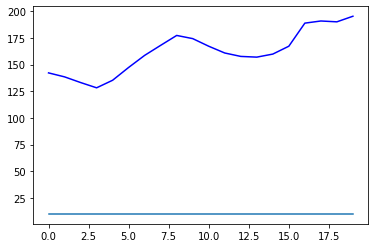

In [83]:
res_x1_1 = [pulp.value(xSUD[1][i]) for i in range(0, len(demand_Sud))]
#res_x1_2 = [pulp.value(xSUD[2][i]) for i in range(0, len(demand_Sud))]
"""
res_x1_2 = [pulp.value(x1_2[i]) for i in range(0, len(demand_Sud))]
res_x1_3 = [pulp.value(x1_3[i]) for i in range(0, len(demand_Sud))]
res_x1_4 = [pulp.value(x1_4[i]) for i in range(0, len(demand_Sud))]
res_x1_5 = [pulp.value(x1_5[i]) for i in range(0, len(demand_Sud))]

res_x2_1 = [pulp.value(x2_1[i]) for i in range(0, len(demand_Nord))]
res_x2_2 = [pulp.value(x2_2[i]) for i in range(0, len(demand_Nord))]
res_x2_3 = [pulp.value(x2_3[i]) for i in range(0, len(demand_Nord))]
res_x2_3 = [pulp.value(x2_4[i]) for i in range(0, len(demand_Nord))]

"""

#plt.plot(demand,'b')
plt.plot(demand_Sud, 'b', res_x1_1)



In [12]:
def elec_plan_graphique(usage_ran_x, usage_ran_y, demande):
    ax = plt.axes(frameon=False, aspect=1)
    plt.xlim(-.2, 5*usage_ran_x), plt.ylim(0, 5*usage_ran_y)
    x = np.arange(10)
    y = np.arange(10)
    plt.plot (demande - x, 'g')
    plt.axvline (x=usage_ran_x, ymin=0, ymax=5*usage_ran_y)
    plt.axhline (y=usage_ran_y)
    #plt.plot (demande - y, 'g')
    plt.fill_between(x, demande - x, color='g', alpha=0.2)
    plt.fill_between(x, usage_ran_y, color='b', alpha=0.2)
    plt.axvspan(0, usage_ran_x, color='b', alpha=0.2)
    #plt.fill_between(x, (8 - 2*x), 8 + 0*x, color='g', alpha=0.2)


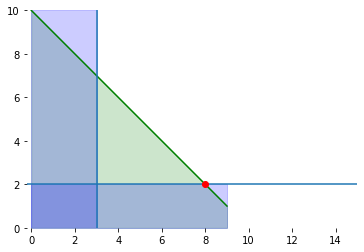

In [13]:
elec_plan_graphique(min_usage_range_x, min_usage_range_y, demande)
plt.plot([x.value()], [y.value()], 'ro')
#plt.plot (demande - x, 'g')

[0 1 2 3 4 5 6 7 8 9]


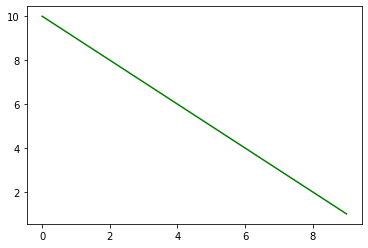

In [14]:
x = np.arange(10)
plt.plot (demande - x, 'g')
print(x)

## Satisfy the demand on a 24 hour plan

Now extend your code to provide a plan of providers usage on a full day, hour by hour, based on a demand itself expressed hour by hour.
Be sure to provide a relevant visualisation of the results once they are correct.  

24
20


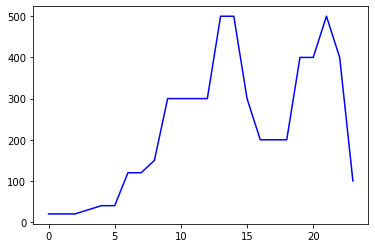

In [29]:
# demand expressed hour by hour
demand = [20, 20, 20 , 30, 40, 40 , 120, 120,
        150, 300, 300, 300, 300, 500, 500, 300,
        200, 200, 200, 400, 400, 500, 400, 100 ] # change the values so they are relevant to yours

print(len(demand))
print(demand[2])

# a simple graphical visualisation of the demand
plt.plot(demand,'b')

In [39]:
# your problem solving code here
prob = pulp.LpProblem("balanceTest", pulp.LpMinimize)

min_usage_range_x = 0
min_usage_range_y = 10
max_usage_range_x = 100
max_usage_range_y = 400

#demande = 10
c = 0
cost_x = 50
cost_y = 100



x = [pulp.LpVariable(f"x_{i}", min_usage_range_x, max_usage_range_x) for i in range(0, len(demand))] # cat continuous is the default, override it with integer 
y = [pulp.LpVariable(f"y_{i}", min_usage_range_y, min_usage_range_y) for i in range(0, len(demand))] # this is the only change to go from LP to MILP

for i in range(0, len(demand)):
    print(i)
    prob += x[i] <= max_usage_range_x
    prob += y[i] <= max_usage_range_y
    prob += x[i] >= min_usage_range_x
    prob += y[i] >= min_usage_range_y
    prob += x[i] + y[i] >= demand[i]
   

prob += sum(cost_x * x[i] + cost_y * y[i] for i in range(0, len(demand)))
assert pulp.LpStatus[prob.solve()] == 'Optimal'

res_x = [pulp.value(x[i]) for i in range(0, len(demand))]
res_y = [pulp.value(y[i]) for i in range(0, len(demand))]

#plt.plot(demand,'b')
plt.plot(demand, 'b')
plt.plot(res_x, 'r')
plt.plot(res_y, 'g')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


AssertionError: 

In [40]:
# %load solutions\24h.py
# a solution :
# minimisation problem
tprob = pulp.LpProblem("Test",pulp.LpMinimize)

# constants
p1min=0
p1max=100
c1=50
p2min=10
p2max=400
c2=100

# variables
p1=[pulp.LpVariable(f"p1_{t}",p1min,p1max) for t in range(0,24)]
p2=[pulp.LpVariable(f"p2_{t}",p2min,p2max) for t in range(0,24)]
#capa=[pulp.LpVariable(f"capa_$t") for t in range(0,24)]

# constraints
for t in range(0,24):
    tprob+=p1[t]>=p1min
    tprob+=p1[t]<=p1max
    tprob+=p2[t]>=p2min
    tprob+=p2[t]<=p2max
    
    tprob+=p1[t]+p2[t]>=demand[t]
    
# objective
tprob+=sum([p1[t]*c1 + p2[t]*c2 for t in range(0,24)])

assert pulp.LpStatus[tprob.solve()] == 'Optimal'



In [41]:
# your results display code here


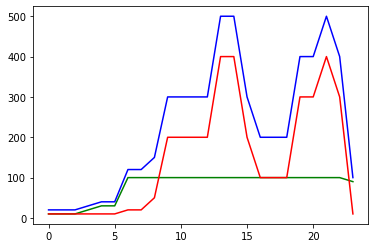

In [42]:
# %load solutions\24hdisp.py

# a solution
p1res=[pulp.value(p1[t]) for t in range(0,24)]
p2res=[pulp.value(p2[t]) for t in range(0,24)]

plt.plot(demand,'b')
plt.plot(p1res,'g')
plt.plot(p2res,'r')

## Add the opportunity to totally stop any provider

Now let's imagine that any provider may be stopped: if 'on' it produces an amount of energy between its min and max, if 'off' it produces 0.

In [43]:
# your code here


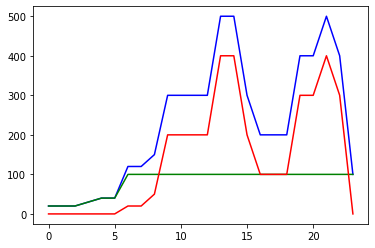

In [45]:
# %load solutions\24honoff.py
# a solution :
# minimisation problem
tprob = pulp.LpProblem("Test",pulp.LpMinimize)

# constants
p1min=0
p1max=100
c1=50
p2min=10
p2max=400
c2=100

# variables

## production
p1=[pulp.LpVariable(f"p1_{t}",0,p1max) for t in range(0,24)]
p2=[pulp.LpVariable(f"p2_{t}",0,p2max) for t in range(0,24)]

## on/off
on1=[pulp.LpVariable(f"on1_{t}",cat=pulp.LpBinary) for t in range(0,24)]
on2=[pulp.LpVariable(f"on2_{t}",cat=pulp.LpBinary) for t in range(0,24)]


# constraints
for t in range(0,24):
    tprob+=p1[t]>=p1min*on1[t] # if 'on' produce at least min
    tprob+=p1[t]<=p1max*on1[t] # if 'on' produce at most max, if 'off' produce 0 
    tprob+=p2[t]>=p2min*on2[t]
    tprob+=p2[t]<=p2max*on2[t]
    
    tprob+=p1[t]+p2[t]>=demand[t]
    
# objective
tprob+=sum([p1[t]*c1 + p2[t]*c2 for t in range(0,24)])


# display
assert pulp.LpStatus[tprob.solve()] == 'Optimal'
p1res=[pulp.value(p1[t]) for t in range(0,24)]
p2res=[pulp.value(p2[t]) for t in range(0,24)]

plt.plot(demand,'b')
plt.plot(p1res,'g')
plt.plot(p2res,'r')

## Modelling a battery effect

If our first provider is turned into a perfect battery (no loss during charging : every excess unit provided is stored until full capacity is reached, no loss when unused)

In [ ]:
# your code here


Total cost is 561000.0


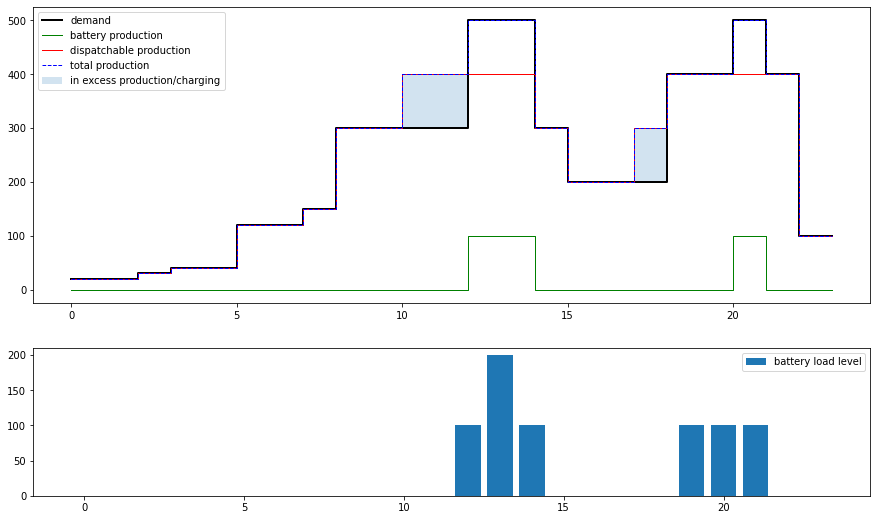

In [47]:
# %load solutions\24hbattery.py
# if p1 is a perfect battery

# a solution :
# minimisation problem
tprob = pulp.LpProblem("Test",pulp.LpMinimize)

# constants
capamax=200 # max capacity of the battery
p1min,p1max=0,100 # production range
c1=50 # cost per unit

p2min,p2max=10,400
c2=100


# variables
## production
p1=[pulp.LpVariable(f"p1_{t}",0,p1max) for t in range(0,24)]
p2=[pulp.LpVariable(f"p2_{t}",0,p2max) for t in range(0,24)]

## on/off
on1=[pulp.LpVariable(f"on1_{t}",cat=pulp.LpBinary) for t in range(0,24)]
on2=[pulp.LpVariable(f"on2_{t}",cat=pulp.LpBinary) for t in range(0,24)]

## battery load
p1load=[pulp.LpVariable(f"p1load_{t}",0,capamax) for t in range(0,24)]


# constraints
p1load[0]=0 # let's start empty
# p1load[0]=capamax # let's start full

for t in range(0,24):
    tprob+=p1[t]>=p1min*on1[t]
    tprob+=p1[t]<=p1max*on1[t]
    tprob+=p2[t]>=p2min*on2[t]
    tprob+=p2[t]<=p2max*on2[t]
    
    tprob+=p1[t]<=p1load[t] # can not provide more than available
    tprob+=p1[t]+p2[t]>=demand[t] # must satify demand

for t in range(1,24): # load level beginning a step is based on the previous one
    tprob+=p1load[t]==p1load[t-1]-p1[t-1]+(p1[t-1]+p2[t-1]-demand[t-1])

    
# objective
tprob+=sum([p1[t]*c1 + p2[t]*c2 for t in range(0,24)])


# display
from matplotlib import gridspec

assert pulp.LpStatus[tprob.solve()] == 'Optimal'
p1res=[pulp.value(p1[t]) for t in range(0,24)]
p2res=[pulp.value(p2[t]) for t in range(0,24)]
ptot=[p1res[t]+p2res[t] for t in range (0,24)]
p1al=[pulp.value(p1load[t]) for t in range(0,24)]

# display results
fig=plt.figure(figsize=(15, 9))
spec=gridspec.GridSpec(ncols=1,nrows=2,height_ratios=[2,1])

# display demand and production rates
fig.add_subplot(spec[0,0])
plt.plot(demand,'k', linewidth=2.0,drawstyle='steps',label="demand")

plt.plot(p1res,'g',linewidth=1.0,drawstyle='steps',label="battery production")
plt.plot(p2res,'r',linewidth=1.0,drawstyle='steps',label="dispatchable production")

plt.plot(ptot,linewidth=1.0,drawstyle='steps',c='b',linestyle='--',zorder=2, label="total production")
plt.fill_between(range(0,24), demand, ptot, step='pre', alpha=0.2, label="in excess production/charging")
plt.legend()


# display battery load
fig.add_subplot(spec[1,0])
plt.bar(range(0,24),p1al,label="battery load level")
plt.legend()

print(f"Total cost is {pulp.value(tprob.objective)}")


## Constraining on/off sequence

<div class="alert alert-warning">
<b>Planning a week of electric production</b>
<p>
An electric utility company owns two power plants.<br/> The first plant can power no less than 50 and up to 400 MW for a production cost of 20€/MWh.<br/> The second plant can power no less than 20 and up to 200 MW for a production cost of 40€/MWh.<br/> An additional constraints states that a power plan, when powered on, must keep on for at least two consecutive hours.
</p><p>
The power plants must meet an electric demand during a week provided in an attached file (one line per hour).
</p>

</div>

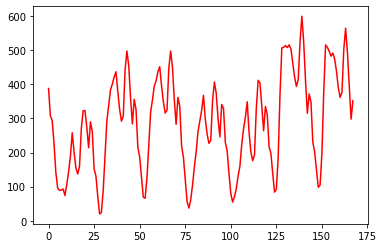

In [48]:
demand = np.loadtxt("demand.txt")
plt.plot(demand, 'r')

costs = np.array([20, 40])
power_max = np.array([400, 200])
power_min = np.array([50, 20])

In [ ]:
# your code here

In [ ]:
# %load solutions\weekplan.py
# minimisation problem
tprob = pulp.LpProblem("Week",pulp.LpMinimize)

# constants
p1min,p2min=power_min
p1max,p2max=power_max
c1,c2=costs
nbsteps=len(demand)

# variables

## production
p1=[pulp.LpVariable(f"p1_{t}",0,p1max) for t in range(0,nbsteps)]
p2=[pulp.LpVariable(f"p2_{t}",0,p2max) for t in range(0,nbsteps)]

## on/off
on1=[pulp.LpVariable(f"on1_{t}",cat=pulp.LpBinary) for t in range(0,nbsteps)]
on2=[pulp.LpVariable(f"on2_{t}",cat=pulp.LpBinary) for t in range(0,nbsteps)]


# constraints
for t in range(0,nbsteps):
    tprob+=p1[t]>=p1min*on1[t] # if 'on' produce at least min
    tprob+=p1[t]<=p1max*on1[t] # if 'on' produce at most max, if 'off' produce 0 
    tprob+=p2[t]>=p2min*on2[t]
    tprob+=p2[t]<=p2max*on2[t]
    
    tprob+=p1[t]+p2[t]>=demand[t]
    
for t in range(1,nbsteps-1):
    tprob+=on1[t]<=on1[t-1]+on1[t+1]
    tprob+=on2[t]<=on2[t-1]+on2[t+1]
    
# objective
tprob+=sum([p1[t]*c1 + p2[t]*c2 for t in range(0,nbsteps)])


# display
assert pulp.LpStatus[tprob.solve()] == 'Optimal'
p1res=[pulp.value(p1[t]) for t in range(0,nbsteps)]
p2res=[pulp.value(p2[t]) for t in range(0,nbsteps)]

plt.plot(demand,'b')
plt.plot(p1res,'g')
plt.plot(p2res,'r')

# Choosing your project

Now its up to you to make the problem evolves and become your project. To extend the problem, several options are welcome :

- make the problem definition more realistic,
- move on to devising the best energy production items,
- ...

Remember that MILP is not the only technique you should be aware of, and depending on your choices, may not be the best one to implement your version of the problem. Constraint Programming or metaheuristics may be best suited to it. Other notebooks are provided to help you discover or rediscover those techniques and associated tools. Be sure to make a good, arguable choice to implement your version of the problem. 